
# COMP20008 2020S1 workshop week 8 



## Linear Regression
We will use a dataset in sklearn to practice linear regression.
The dataset is Boston house prices that comes with sklearn. Please see the description below:

In [1]:
from sklearn import datasets 
import pandas as pd

data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
# X: features 
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# y: target
target = pd.DataFrame(data.target, columns=["MEDV"])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Example lm 
The following fits a linear regression model using the two variables **RM** (average number of rooms per dwelling) and **LSTAT** (%lower status of the population) to predict **MEDV** (Median value of owner-occupied homes in \$1000's). 



In [4]:
##  Example
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['RM', 'LSTAT']]
y = target['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



actual MEDV values of the first 5 test data:
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64

predicted MEDV values of the first 5 test data:
[25.50510964 30.8592405  17.42725985 25.81325491 19.64929972]

Coefficients:  [ 5.46509877 -0.63249856]

Intercept:  -3.841177079004847

Coefficient of determination (test): 0.57
Coefficient of determination (training): 0.65


## Question 4

Write out the fitted linear model in Example 1 and Interpret the results

In [ ]:
## Answer to Question 4




## Question 5
Plot the residuals for the test data as well as the training data of the model in Example 1

Include legends in the scatter plot; include the Coefficient of Determination for each legend.

In [ ]:
## Answer to Question 5




## Question 6

Fit another linear model using all 13 variables to predict **MEDV** (Median value of owner-occupied homes in \$1000's). 

Compare the results with those of the model in Question 1

In [ ]:
## Answer to Question 6








## VAT - visualising clustering tendency

In the lecture we discussed the VAT algorithm for visualising the clustering tendency of a dataset.   Below is python code for VAT.  You can treat it as a black box (not worrying about the internal coding details) - a function which can be used to execute VAT on an input dataset.



In [5]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I




### Visualising iris datset using VAT

We will first recreate the visualisations of the iris dataset used in lectures.   Info about the iris dataset is [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).  

First a heatmap of the raw iris dataset is displayed.  

Secondly a randomly ordered dissimilarity matrix for the objects in iris is shown - notice the lack of structure.   

Thirdly the VAT visualisation is produced.  The heatmap function from the seaborn package is employed as a convenient tool for plotting heatmaps.

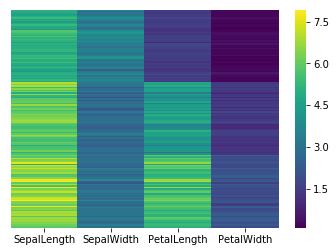

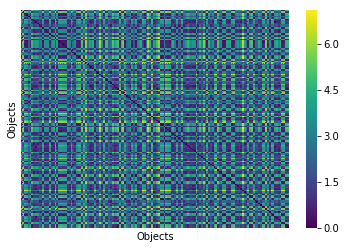

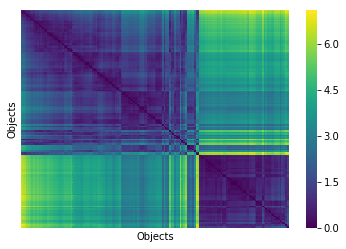

In [6]:
import seaborn as sns

##########################################################
#######Read in the datset###############
##########################################################
iris= pd.read_csv('iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns

####Draw heatmap of raw Iris matrix#######j
sns.heatmap(iris2,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()



####Visualise the dissimilarity matrix for Iris using a heatmap (without applying VAT)####
iris3=iris2.copy().values
np.random.shuffle(iris3)   ####randomise the order of rows (objects)
sq = squareform(pdist(iris3))   ###commpute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()



#####Apply VAT Algorithm to Iris dataset and visualise using heatmap########
RV, C, I = VAT(iris2)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

### Question 7a)
How many clusters does the VAT visualisation reveal?   Is this what you were expecting given the wikipedia description of this dataset?


In [ ]:
Answer 7a)


### Practicing VAT

You will now practice using the australian crabs dataset from [this file](australian-crabs.csv).   This data describes 200 crabs collected from Fremantle Western Australia.   There are two species of crabs - blue and orange.   Within each species there are male and female.   

There are 5 features:

FL - frontal lip
RW - rear width
CL - carapace length
CW - carapace width
BD - body depth

The first four of these are visualised as follows:
    
![crabs image](crabsimage.png "crabsimage.png")



### Question 7b) 

Adapt the iris example to produce a VAT heatmap of the australian crabs dataset.   How many clusters are there?


In [ ]:
###Answer 7b

